# Algoritmo de Shor

Antes de empezar con el desarrollo del algoritmo de Shor, importaremos las librerías y funciones necesarias:

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

In [17]:
def qft(n):
    """
    Implementación de la Transformada de Fourier Cuántica (QFT) en un circuito cuántico de n qubits.

    Args:
        n (int): Número de qubits en el circuito cuántico.
    Returns:
        qc (QuantumCircuit): Circuito cuántico que implementa la QFT.
    """
    # Creamos el circuito cuántico con n qubits
    qc = QuantumCircuit(n) 

    # Aplicamos un bucle para recorrer los qubits en orden invers
    for i in range(n-1, -1, -1):
        # Aplicamos la puerta Hadamard a cada qubit
        qc.h(i)

        # Aplicamos otro bucle para tener en cuenta los qubits que están por encima del qubit actual
        for j in range(i-1, -1, -1):
            # Aplicamos la puerta CP 
            angle = np.pi / 2**(i - j)
            qc.cp(angle, j, i)

        
    
    for i in range(n // 2):
        # Aplicamos la compuerta SWAP para intercambiar los qubits
        qc.swap(i, n - i - 1)
    
    # Hacemos que sea una puerta cuántica
    gate = qc.to_gate()
    gate.name = "QFT"

    return gate

In [22]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import XGate

def _10mod21():
    circ = QuantumCircuit(10)

    # Caso x = 0 (00000): f(0) = 1 → 00001
    # Activar salida[9] si entrada es 00000
    circ.x(0)
    circ.x(1)
    circ.x(2)
    circ.x(3)
    circ.x(4)
    circ.mcx([0,1,2,3,4], 9)  # salida[9] = 1
    circ.x(0)
    circ.x(1)
    circ.x(2)
    circ.x(3)
    circ.x(4)

    # Caso x = 1 (00001): f(1) = 10 → 01010
    circ.x(1)
    circ.x(2)
    circ.x(3)
    circ.x(4)
    circ.mcx([0,1,2,3,4], 6)  # salida[6] = 1
    circ.mcx([0,1,2,3,4], 8)  # salida[8] = 1
    circ.x(1)
    circ.x(2)
    circ.x(3)
    circ.x(4)

    # Caso x = 2 (00010): f(2) = 16 → 10000
    circ.x(0)
    circ.x(2)
    circ.x(3)
    circ.x(4)
    circ.mcx([0,1,2,3,4], 5)  # salida[5] = 1
    circ.x(0)
    circ.x(2)
    circ.x(3)
    circ.x(4)

    # Caso x = 3 (00011): f(3) = 13 → 01101
    circ.x(2)
    circ.x(3)
    circ.x(4)
    circ.mcx([0,1,2,3,4], 6)  # salida[6] = 1
    circ.mcx([0,1,2,3,4], 7)  # salida[7] = 1
    circ.mcx([0,1,2,3,4], 9)  # salida[9] = 1
    circ.x(2)
    circ.x(3)
    circ.x(4)

    # Convert to a gate
    gate = circ.to_gate()
    gate.name = "10^x mod 21"
    return gate

In [ ]:
def _7mod15():
        
    circ = QuantumCircuit(8)
    circ.x(4)
    circ.cx(0,5)
    circ.cx(0,6)
    circ.cx(1,4)
    circ.cx(1,6)
    for i in range(4,8):
        circ.ccx(0,1,i)
    gate = circ.to_gate()
    gate.name = "7^x mod 15"
    return circ

In [23]:
def shor():
    qc = QuantumCircuit(10, 5)
    qc.h(range(5))  # Hadamard en los primeros 5 qubits (registro de entrada)
    qc.append(_10mod21(), range(10))  # Aplica la función modular
    qc.measure(range(5, 10), range(5))  # Mide los 5 qubits de salida
    qc.barrier(range(10))
    qc.append(qft(5), range(5))  # QFT sobre los qubits de entrada
    qc.measure(range(5), range(5))  # Mide los qubits de entrada
    return qc

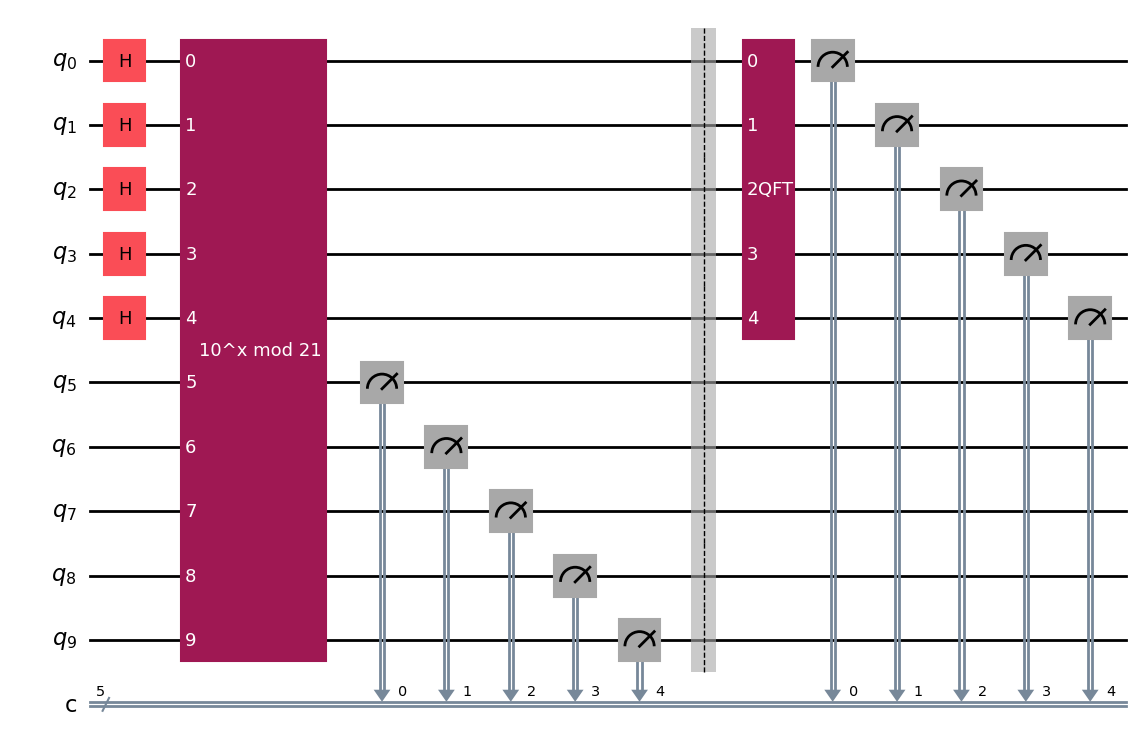

In [24]:
qc = shor()
qc.draw('mpl')